In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
%cd /content/drive/MyDrive/LGDXSCHOOL 2기/DeepLearning

/content/drive/MyDrive/LGDXSCHOOL 2기/DeepLearning


### 학습목표
- MLP 학습을 통하여 모델의 성능을 올려보자
- 이진분류 실습 -> 이진분류 데이터 학습 신경망 모델 설계 방법을 알아보자
- 유방암 데이터를 바탕으로 유방암 여부를 분류
  - sklearn 제공해주는 breast_cancer 사용

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer # sklearn 내장 유방암 데이터

In [3]:
data = load_breast_cancer()

data
# 번치객체 - 딕셔너리 형태

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

- data : 문제데이터, 입력특성
- feature_names : 입력특성의 이름(컬럼명)
- target: 정답데이터(인덱스)
- target_names: 정답데이터의 이름/ 0-malignant(악성), 1-benign(양성)
- DESCR : 데이터 설명

In [5]:
data.target_names
# 클래스 2개 -> 이진분류실습

array(['malignant', 'benign'], dtype='<U9')

In [6]:
# 문제, 정답 분리
X = data['data']
y = data['target']
print(X.shape, y.shape)

(569, 30) (569,)


In [7]:
print(data.feature_names)
print(len(data.feature_names))

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
30


In [8]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Dense

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=6, stratify=y)
# stratify=y : y의 랜덤샘플링의 비율을 일정하게 설정(클래스 분리 비율)
# 안정적인 데이터 분리 -> 과대적합 예방
model = Sequential()
model.add(InputLayer(shape=(30,))) # 입력특성의 개수를 명확하게 입력
model.add(Dense(units=16, activation='sigmoid'))  # 퍼셉트론 = 선형모델 + 활성화함수
model.add(Dense(units=8, activation='sigmoid'))
# 중간층의 활성화함수: 단순 선형변황을 넘어 비선형을 추가 -> 복잡한 패턴을 학습할 수 있음

model.add(Dense(units=1, activation='sigmoid'))
# 이진분류 -> 1개의 확률값 :units=1 --> 분류 모델은 activation 사용/이진분류는 'sigmoid'(0~1사이의 값) 사용
# 출력층에서 활성화 함수 : 출력데이터의 형태를 변경
# 이진분류: sigmoid -> 선형모델이 출력한 연속데이터 -> 0~1 사이의 확률값 변경


In [12]:
# 2. 학습방법 및 평가방법 설정
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])
# 이진분류 -> binary_crossentropy, SGD: 경사하강법, metrics:평가지표

# 학습
model.fit(X_train,y_train, validation_split=0.2, epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.6091 - loss: 0.6673 - val_accuracy: 0.6500 - val_loss: 0.6502
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6200 - loss: 0.6501 - val_accuracy: 0.6500 - val_loss: 0.6288
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5798 - loss: 0.6568 - val_accuracy: 0.6500 - val_loss: 0.6273
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6155 - loss: 0.6427 - val_accuracy: 0.6500 - val_loss: 0.6279
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6296 - loss: 0.6336 - val_accuracy: 0.6500 - val_loss: 0.6309
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6421 - loss: 0.6286 - val_accuracy: 0.6500 - val_loss: 0.6270
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6466 - loss: 0.6263 - val_accuracy: 0.6500 - val_loss: 0.6261
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6363 - loss: 0.6295 - val_accuracy: 0.

#### 비유
- (train_)accuracy : 학습
- val_accuracy : 모의고사 점수
- test_accuracy : 시험 점수

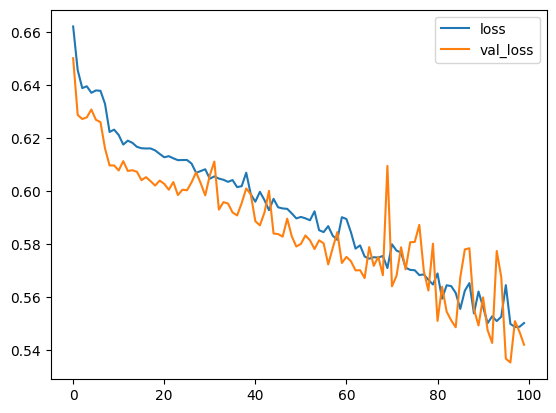

In [14]:
# 학습결과 시각화 -> 학습데이터, 검증데이터 결과를 확인 -> 일반화 확인
plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='val_loss')
plt.legend()

- 오차가 둘 다 줄어들고 있음을 확인
- 경사하강법 진행시 초기값을 랜덤으로 설정하기 때문에 -> 패턴이 완전히 같지 않을 수 있음
- 전체적인 경향 확인 -> 오차가 train, val 모두 감소

In [15]:
# 평가
model.evaluate(X_test,y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6302 - loss: 0.5358 


[0.5412642955780029, 0.6257309913635254]

- 0.6 정도의 낮은 정확도

In [16]:
# 모델에 대한 전체적인 내부구조 확인
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 16)                  │             496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 643 (2.52 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [20]:
496/30

16.533333333333335

In [19]:
136/16

8.5

- 입력층 30 * 16은 약 496개
- 첫 번째 은닉층 16 * 8은 약 136개...